In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[6],gb7[4],red7[2],yg7[0]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp4)
sns.color_palette()

[(0.20872433679354097, 0.2971118800461361, 0.23389619377162635),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def PARALia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer', 'pred_t', 'pred_J'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64, 'pred_t': np.float64, 'pred_J': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

all_dev = 8
def keep_dev_8(dataframe):
    return dataframe[dataframe['dev_num'] == all_dev]

    
devices=8
machine = 'vulcan'
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 4*(1024*1024*1024)*devices # Questionable limit
Rmax_Gflops = 7*1024*devices
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'

version="1.4"
split="ST-2D-BLOCK-CYCLIC"
sr_over=""
implementation="_UN-PB-L4"
pw_optimize="_PW-PRED-PERF"

impl_hops="_ALL-HOPS-1-0.15"
homedir = "~/mount_vulcan"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench"
#XKBLAS_nocache_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
#print('XKBLAS_nocache_data len: %d' % len(XKBLAS_nocache_data))
#BLASx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
#print('BLASx_data len: %d' % len(BLASx_data))
#BLASxEx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
#print('BLASxEx_data len: %d' % len(BLASxEx_data))
#cuBLASXt_best_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/cuBLASXtDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
#print('cuBLASXt_best_data len: %d' % len(cuBLASXt_best_data))

sr_over=""
impl_hops="_RONLY-HOPS-1-0.15"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Rhops-old"
CoCopeLia_data_rhops = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                          %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('CoCopeLia_data_rhops len: %d' % len(CoCopeLia_data_rhops))
CoCopeLia_data_rhops_alldev = keep_dev_8(CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                 %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_rhops_alldev len: %d\n' % len(CoCopeLia_data_rhops_alldev))

impl_hops=""
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Nohops"
CoCopeLia_data_nohops_alldev = (CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_nohops_alldev len: %d' % len(CoCopeLia_data_nohops_alldev))
cuBLASXt_best_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/cuBLASXtDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('cuBLASXt_best_data len: %d\n' % len(cuBLASXt_best_data))

impl_hops="_RONLY-HOPS-1-0.20"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Rhops-0.2pen"
CoCopeLia_data_rhops_02pen_alldev = (CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_rhops_02pen_alldev len: %d' % len(CoCopeLia_data_rhops_02pen_alldev))
BLASxEx_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

impl_hops="_ALL-HOPS-1-0.20"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-bench-Allhops-0.2pen"
CoCopeLia_data_allhops_02pen_alldev = (CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_alldev len: %d' % len(CoCopeLia_data_allhops_02pen_alldev))
XKBLAS_nocache_data = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('XKBLAS_nocache_data len: %d' % len(XKBLAS_nocache_data))
CoCopeLia_data_allhops_02pen_preddev = CoCoPeLia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('CoCopeLia_data_allhops_02pen_preddev len: %d\n' % len(CoCopeLia_data_allhops_02pen_preddev))

version="1.5"
benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-final-zero-perf-aggregator"
CoCopeLia_data_allhops_02pen_ESPA_0ag_pred = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_0ag_pred len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred))

benchdir= homedir + "/PhD_stuff/CoCoPeLia-Framework-final-one-perf-aggregator"
CoCopeLia_data_allhops_02pen_ESPA_1ag_pred = (PARALia_log_read('%s/%s-build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_1ag_pred len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred))

CoCopeLia_data_rhops len: 6060
CoCopeLia_data_rhops_alldev len: 6020

CoCopeLia_data_nohops_alldev len: 12500
cuBLASXt_best_data len: 12500

CoCopeLia_data_rhops_02pen_alldev len: 12500
BLASxEx_data len: 12500

CoCopeLia_data_allhops_02pen_alldev len: 12500
XKBLAS_nocache_data len: 12420
CoCopeLia_data_allhops_02pen_preddev len: 12500

CoCopeLia_data_allhops_02pen_ESPA_0ag_pred len: 34975

CoCopeLia_data_allhops_02pen_ESPA_1ag_pred len: 33900



In [6]:
def CoCoPeLia_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_modified_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).mean()
    #print(result)
    return result
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)

def CoCoPeLia_grouby_min(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).min()

def CoCoPeLia_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def CoCoPeLia_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3) & (df['M'] == df['N']) & (df['M'] < df['K'])]

In [7]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)

# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [8]:
def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [9]:
    dgemm_bytes(cuBLASXt_best_data)
    dgemm_flops(cuBLASXt_best_data)
    cuBLASXt_best_data['perf'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['timer'])
    cuBLASXt_best_data['loc_str'] = 100*(cuBLASXt_best_data['Asloc']+1) + 10*(cuBLASXt_best_data['Bsloc']+1) + cuBLASXt_best_data['Csloc']+1
    cuBLASXt_best_data['imp'] = '0.cuBLASXt'
    print("cuBLASXt_best_data mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)), cuBLASXt_best_data['perf'].mean()))
    
    dgemm_bytes(BLASxEx_data)
    dgemm_flops(BLASxEx_data)
    BLASxEx_data['perf'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['timer'])
    BLASxEx_data['loc_str'] = 100*(BLASxEx_data['Asloc']+1) + 10*(BLASxEx_data['Bsloc']+1) + BLASxEx_data['Csloc']+1
    BLASxEx_data['imp'] = '1.BLASX'
    print("BLASxEx_data mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(BLASxEx_data)), BLASxEx_data['perf'].mean()))
    
    dgemm_bytes(XKBLAS_nocache_data)
    dgemm_flops(XKBLAS_nocache_data)
    XKBLAS_nocache_data['perf'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['timer'])
    XKBLAS_nocache_data['loc_str'] = 100*(XKBLAS_nocache_data['Asloc']+1) + 10*(XKBLAS_nocache_data['Bsloc']+1) + XKBLAS_nocache_data['Csloc']+1
    XKBLAS_nocache_data['imp'] = '2.XKBLAS'
    print("XKBLAS_nocache_data mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)), XKBLAS_nocache_data['perf'].mean()))

    dgemm_bytes(CoCopeLia_data_rhops_alldev)
    dgemm_flops(CoCopeLia_data_rhops_alldev)
    CoCopeLia_data_rhops_alldev['perf'] = CoCopeLia_data_rhops_alldev['flops']/(1e9*CoCopeLia_data_rhops_alldev['timer'])
    CoCopeLia_data_rhops_alldev['loc_str'] = 100*(CoCopeLia_data_rhops_alldev['Asloc']+1) + 10*(CoCopeLia_data_rhops_alldev['Bsloc']+1) + CoCopeLia_data_rhops_alldev['Csloc']+1
    CoCopeLia_data_rhops_alldev['imp'] = 'Rhops-0.15-old'
    print("CoCopeLia_data_rhops_alldev mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_rhops_alldev)), CoCopeLia_data_rhops_alldev['perf'].mean()))

    dgemm_bytes(CoCopeLia_data_nohops_alldev)
    dgemm_flops(CoCopeLia_data_nohops_alldev)
    CoCopeLia_data_nohops_alldev['perf'] = CoCopeLia_data_nohops_alldev['flops']/(1e9*CoCopeLia_data_nohops_alldev['timer'])
    CoCopeLia_data_nohops_alldev['loc_str'] = 100*(CoCopeLia_data_nohops_alldev['Asloc']+1) + 10*(CoCopeLia_data_nohops_alldev['Bsloc']+1) + CoCopeLia_data_nohops_alldev['Csloc']+1
    CoCopeLia_data_nohops_alldev['imp'] = '3.Nohops'
    print("CoCopeLia_data_nohops_alldev mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_nohops_alldev)), CoCopeLia_data_nohops_alldev['perf'].mean()))

    
    dgemm_bytes(CoCopeLia_data_rhops_02pen_alldev)
    dgemm_flops(CoCopeLia_data_rhops_02pen_alldev)
    CoCopeLia_data_rhops_02pen_alldev['perf'] = CoCopeLia_data_rhops_02pen_alldev['flops']/(1e9*CoCopeLia_data_rhops_02pen_alldev['timer'])
    CoCopeLia_data_rhops_02pen_alldev['loc_str'] = 100*(CoCopeLia_data_rhops_02pen_alldev['Asloc']+1) + 10*(CoCopeLia_data_rhops_02pen_alldev['Bsloc']+1) + CoCopeLia_data_rhops_02pen_alldev['Csloc']+1
    CoCopeLia_data_rhops_02pen_alldev['imp'] = '4.Rhops-0.2'
    print("CoCopeLia_data_rhops_02pen_alldev mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_rhops_02pen_alldev)), CoCopeLia_data_rhops_02pen_alldev['perf'].mean()))

    dgemm_bytes(CoCopeLia_data_allhops_02pen_alldev)
    dgemm_flops(CoCopeLia_data_allhops_02pen_alldev)
    CoCopeLia_data_allhops_02pen_alldev['perf'] = CoCopeLia_data_allhops_02pen_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_alldev['timer'])
    CoCopeLia_data_allhops_02pen_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_alldev['Csloc']+1
    CoCopeLia_data_allhops_02pen_alldev['imp'] = '5.Allhops-0.2'
    print("CoCopeLia_data_allhops_02pen_alldev mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_alldev)), CoCopeLia_data_allhops_02pen_alldev['perf'].mean()))
    
    #dgemm_bytes(CoCopeLia_data_allhops_02pen_select_sk_low_alldev)
    #dgemm_flops(CoCopeLia_data_allhops_02pen_select_sk_low_alldev)
    #CoCopeLia_data_allhops_02pen_select_sk_low_alldev['perf'] = CoCopeLia_data_allhops_02pen_select_sk_low_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_select_sk_low_alldev['timer'])
    #print("CoCopeLia_data_allhops_02pen_select_sk_low_alldev mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_select_sk_low_alldev['perf'].mean())
    #CoCopeLia_data_allhops_02pen_select_sk_low_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_select_sk_low_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_select_sk_low_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_select_sk_low_alldev['Csloc']+1
    #CoCopeLia_data_allhops_02pen_select_sk_low_alldev['imp'] = '6.Allhops-0.2 - select_sk_low'
    
    #dgemm_bytes(CoCopeLia_data_allhops_02pen_select_sk_high_alldev)
    #dgemm_flops(CoCopeLia_data_allhops_02pen_select_sk_high_alldev)
    #CoCopeLia_data_allhops_02pen_select_sk_high_alldev['perf'] = CoCopeLia_data_allhops_02pen_select_sk_high_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_select_sk_high_alldev['timer'])
    #print("CoCopeLia_data_allhops_02pen_select_sk_high_alldev mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_select_sk_high_alldev['perf'].mean())
    #CoCopeLia_data_allhops_02pen_select_sk_high_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_select_sk_high_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_select_sk_high_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_select_sk_high_alldev['Csloc']+1
    #CoCopeLia_data_allhops_02pen_select_sk_high_alldev['imp'] = '7.Allhops-0.2 - select_sk_high'
    
    dgemm_bytes(CoCopeLia_data_allhops_02pen_preddev)
    dgemm_flops(CoCopeLia_data_allhops_02pen_preddev)
    CoCopeLia_data_allhops_02pen_preddev['perf'] = CoCopeLia_data_allhops_02pen_preddev['flops']/(1e9*CoCopeLia_data_allhops_02pen_preddev['timer'])
    CoCopeLia_data_allhops_02pen_preddev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_preddev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_preddev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_preddev['Csloc']+1
    CoCopeLia_data_allhops_02pen_preddev['imp'] = '6.Allhops-0.2 Oldmodel-Predict Units'   
    print("CoCopeLia_data_allhops_02pen_preddev mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_preddev)), CoCopeLia_data_allhops_02pen_preddev['perf'].mean()))

    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred)
    CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['perf'] = CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['imp'] = '7.Allhops-0.2-ESPA MAX-comm-aggregator'
    print("CoCopeLia_data_allhops_02pen_ESPA_0ag_pred mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_0ag_pred)), CoCopeLia_data_allhops_02pen_ESPA_0ag_pred['perf'].mean()))
   
    dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred)
    dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred)
    CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['perf'] = CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['timer'])
    CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['Csloc']+1
    CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['imp'] = '7.1.Allhops-0.2-ESPA SUM-comm-aggregator'
    print("CoCopeLia_data_allhops_02pen_ESPA_1ag_pred mean of %d cases -> perf = %lf Gflops/s" % (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_1ag_pred)), CoCopeLia_data_allhops_02pen_ESPA_1ag_pred['perf'].mean()))

cuBLASXt_best_data mean of 710 cases -> perf = 3847.871004 Gflops/s
BLASxEx_data mean of 710 cases -> perf = 10224.578950 Gflops/s
XKBLAS_nocache_data mean of 702 cases -> perf = 8371.323652 Gflops/s
CoCopeLia_data_rhops_alldev mean of 281 cases -> perf = 15640.159582 Gflops/s
CoCopeLia_data_nohops_alldev mean of 710 cases -> perf = 11404.583845 Gflops/s
CoCopeLia_data_rhops_02pen_alldev mean of 710 cases -> perf = 15660.421021 Gflops/s
CoCopeLia_data_allhops_02pen_alldev mean of 710 cases -> perf = 18400.439119 Gflops/s
CoCopeLia_data_allhops_02pen_preddev mean of 710 cases -> perf = 17743.833330 Gflops/s
CoCopeLia_data_allhops_02pen_ESPA_0ag_pred mean of 370 cases -> perf = 20218.250719 Gflops/s
CoCopeLia_data_allhops_02pen_ESPA_1ag_pred mean of 359 cases -> perf = 15027.698593 Gflops/s


   T  dev_num  dev_id_token  cachesize_limit TransA TransB   alpha    beta  \
0 -1       -1             0                0      N      N  1.2345  1.1154   
1 -1       -1             0                0      N      N  1.2345  1.1154   
2 -1       -1             0                0      N      N  1.2345  1.1154   
3 -1       -1             0                0      N      N  1.2345  1.1154   
4 -1       -1             0                0      N      N  1.2345  1.1154   

     M    N  ...  Csloc  CsOutloc       flops     bytes  loc_str       imp  \
0  224  224  ...     -1        -1  2055309312  73801728        0   1.BLASX   
1  224  224  ...     -1        -1  2055309312  73801728        0  2.XKBLAS   
2  224  224  ...      0         0  2055309312  73801728        1   1.BLASX   
3  224  224  ...      0         0  2055309312  73801728        1  2.XKBLAS   
4  224  224  ...      5         5  2055309312  73801728       16   1.BLASX   

      timer         perf pred_t  pred_J  
0  0.001620  1886.01

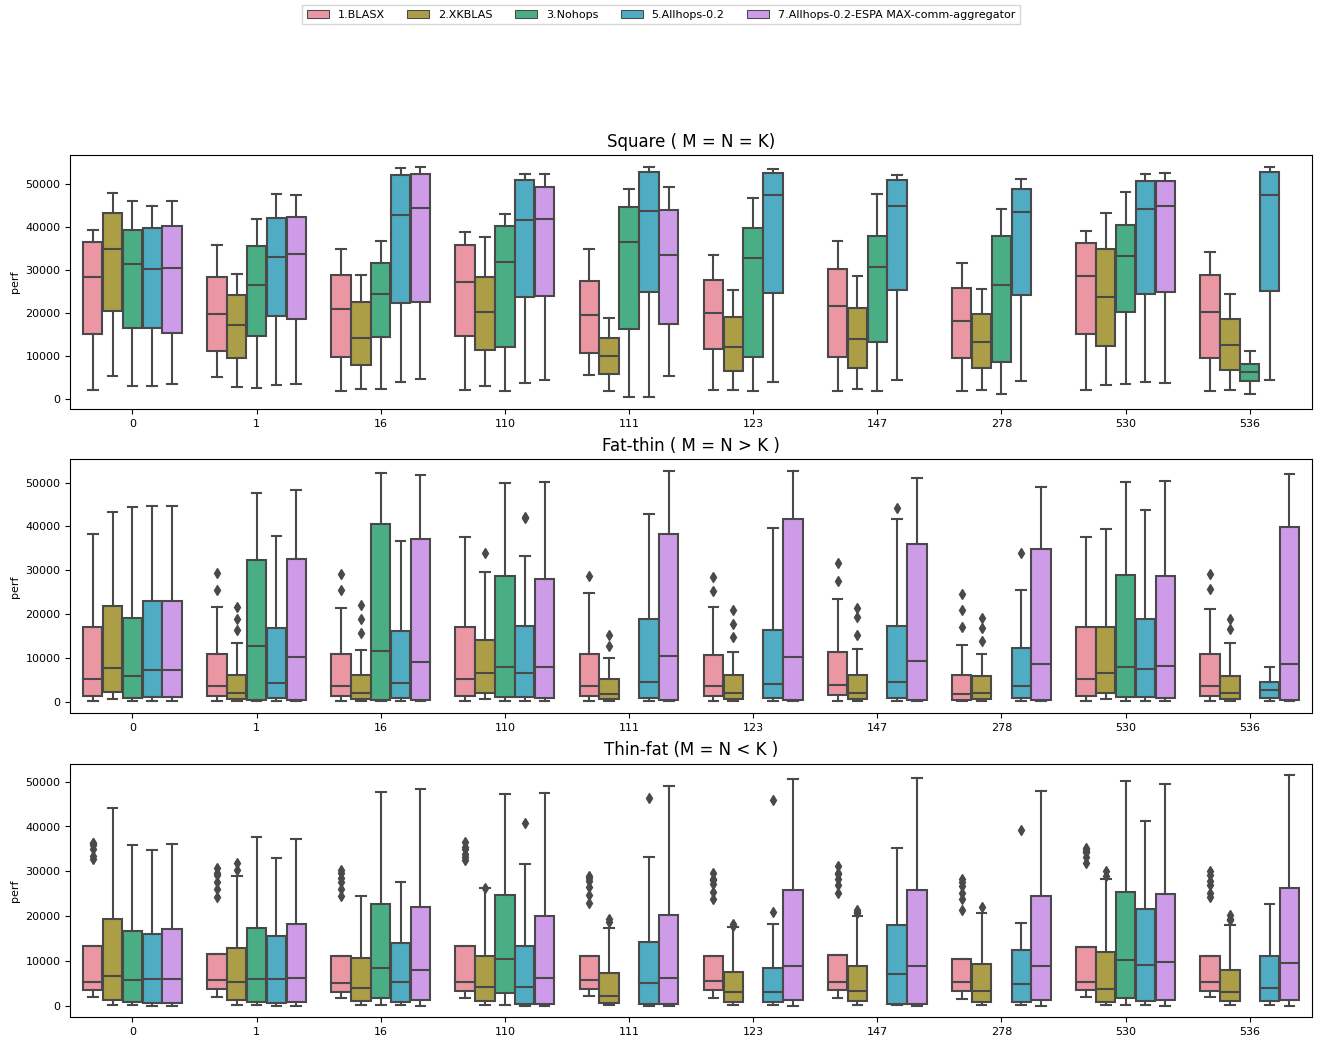

In [12]:
CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_rhops_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_nohops_alldev])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_rhops_02pen_alldev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_alldev])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_preddev])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_0ag_pred])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_1ag_pred])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_select_sk_low_alldev])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_select_sk_high_alldev])
CoCopeLia_all_data_mean = CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev)
print(CoCopeLia_all_data_mean.head(5))
CoCopeLia_all_data_alldev_list = []
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(3)
fig.set_size_inches(width*4, height*5)
fig.subplots_adjust(left=.1, bottom=.06, right=.99, top=.86)
for ctr in range(0,len(ax)):
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'perf', hue = 'imp', ax=ax[ctr])
    ax[ctr].set_title(elem_name[ctr])
    ax[ctr].get_legend().remove()
    #ax[ctr].set_xticks([])
    ax[ctr].set_xlabel('')
    #ax[ctr].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
    if ctr == 0: 
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_sumup.pdf' % (machine))        

loc = [-1, -1, -1]
XKBLAS_nocache_data_p mean perf = 14076.697291 Gflops/s
BLASxEx_data_p mean perf = 11994.329460 Gflops/s
BLASxEx_data_p mean perf = 11994.329460 Gflops/s
CoCopeLia_data_nohops_alldev_p mean perf = 10929.710973 Gflops/s
CoCopeLia_data_rhops_02pen_alldev_p mean perf = 11435.720410 Gflops/s
CoCopeLia_data_allhops_02pen_alldev_p mean perf = 11849.992478 Gflops/s


NameError: name 'CoCopeLia_data_allhops_02pen_ESPA_alldev' is not defined

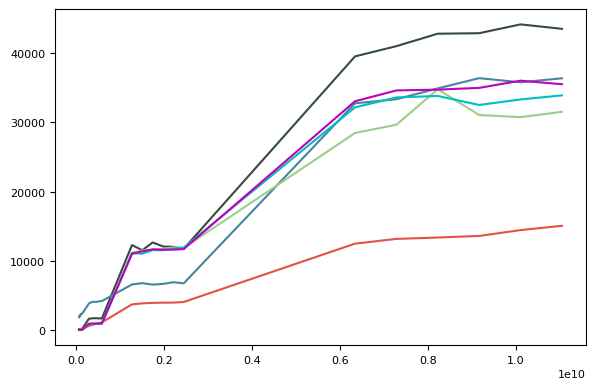

In [11]:
# Plot all, in respect to Problem size
for loc in [[-1,-1,-1], [0,0,-1], [4,2,-1], [-1,-1,0], [-1,0,5], [0,0,0], [0,1,2], [0,3,6], [4,2,5], [1,6,7]]:
    print("loc = " + str(loc))
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.16, bottom=.16, right=.99, top=.86)

    XKBLAS_nocache_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(XKBLAS_nocache_data, loc[0], loc[1], loc[2]))
    XKBLAS_nocache_data_p.sort_values(inplace = True, by = ['bytes'])
    print("XKBLAS_nocache_data_p mean perf = %lf Gflops/s" % XKBLAS_nocache_data_p['perf'].mean())
    plt.plot(XKBLAS_nocache_data_p['bytes'], XKBLAS_nocache_data_p['perf'], color=cp4[0], label='XKBLAS-fair')

    BLASxEx_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(BLASxEx_data, loc[0], loc[1], loc[2]))
    BLASxEx_data_p.sort_values(inplace = True, by = ['bytes'])
    print("BLASxEx_data_p mean perf = %lf Gflops/s" % BLASxEx_data_p['perf'].mean())
    plt.plot(BLASxEx_data_p['bytes'], BLASxEx_data_p['perf'], color=cp4[1], label='BLASX-buf-reuse')

    cuBLASXt_best_data_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(cuBLASXt_best_data, loc[0], loc[1], loc[2]))
    cuBLASXt_best_data_p.sort_values(inplace = True, by = ['bytes'])
    print("BLASxEx_data_p mean perf = %lf Gflops/s" % BLASxEx_data_p['perf'].mean())
    plt.plot(dgemm_bytes(cuBLASXt_best_data_p), dgemm_flops(cuBLASXt_best_data_p)/(1e9*cuBLASXt_best_data_p['timer']),  color=cp4[2], label='cuBLASXt-best')

           
    CoCopeLia_data_nohops_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_nohops_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_nohops_alldev_p.sort_values(inplace = True, by = ['bytes'])
    print("CoCopeLia_data_nohops_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_nohops_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_nohops_alldev_p['bytes'], CoCopeLia_data_nohops_alldev_p['perf'], color=cp4[3], label='CoCopeLia.1.2')

    CoCopeLia_data_rhops_02pen_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_rhops_02pen_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_rhops_02pen_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_rhops_02pen_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_rhops_02pen_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_rhops_02pen_alldev_p['bytes'], CoCopeLia_data_rhops_02pen_alldev_p['perf'], color='c', label='CoCopeLia.1.4 Allhops')
         
    CoCopeLia_data_allhops_02pen_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_allhops_02pen_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_allhops_02pen_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_allhops_02pen_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_allhops_02pen_alldev_p['bytes'], CoCopeLia_data_allhops_02pen_alldev_p['perf'], color='m', label='CoCopeLia.1.4 Rhops')
   
    CoCopeLia_data_allhops_02pen_ESPA_alldev_p = CoCoPeLia_grouby_avg(CoCoPeLia_select_indata_locs(CoCopeLia_data_allhops_02pen_ESPA_alldev, loc[0], loc[1], loc[2]))
    CoCopeLia_data_allhops_02pen_ESPA_alldev_p.sort_values(inplace = True, by = ['bytes'])    
    print("CoCopeLia_data_allhops_02pen_ESPA_alldev_p mean perf = %lf Gflops/s" % CoCopeLia_data_allhops_02pen_ESPA_alldev_p['perf'].mean())
    plt.plot(CoCopeLia_data_allhops_02pen_ESPA_alldev_p['bytes'], CoCopeLia_data_allhops_02pen_ESPA_alldev_p['perf'], color='b', label='CoCopeLia.1.4 ESPA')
    
    plt.grid(axis='y')
    plt.ylabel('Performance (Gflops/s)')
    plt.xlabel('Problem Size')

    #ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    plt.axhline(Rmax_Gflops, linewidth = 0.5, color='b', linestyle = '--')
    plt.text(xmax - (xmax-xmin)*0.05, Rmax_Gflops*0.95, 'Peak' , fontsize = font -2, color='b')
    #plt.axvline(MemMax,color='c',linewidth = 0.5, linestyle = '--')
    #plt.text(MemMax*1.01, ymin + (ymax-ymin)*0.05, 'Combined GPU Mem', fontsize = font -2, color='c')

    plt.xscale('log')
    #fig.set_size_inches(width, height)
    fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
        fontsize=font, fancybox = False, ncol=3)
    #fig.savefig('Plot-Transpose-Comparisson-%s.pdf' % machine)
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.png' % (machine, loc[0], loc[1], loc[2]))
    fig.savefig('Plots/MaxDev/Plot_testbed-%s_gflops_dataloc_%d_%d_%d.pdf' % (machine, loc[0], loc[1], loc[2]))
    plt.close()